In [23]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import traceback

In [3]:
%matplotlib inline

In [14]:
# path constants
PATH_DATA = "data"

In [4]:
# mel spectogram parameters
MEL_N_FFT = 1024
MEL_HOP_LENGTH = 512
MEL_NUM_MELS = 128

In [5]:
# helper function to compute melspectogram, with default parameters
def mel(sample, sr, n_fft=MEL_N_FFT, hop_length=MEL_HOP_LENGTH, n_mels=MEL_NUM_MELS):
    S = librosa.feature.melspectrogram(y=sample, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    return librosa.power_to_db(S, ref=np.max)

In [6]:
# helper function to help visualise audio in a Jupyter notebook
def visualize(sample=None, sr=None, S=None, hop_length=MEL_HOP_LENGTH):
    # compute S from sample and sr if not already provided
    if S is None and (sample is not None and sr is not None):
        S = mel(sample, sr, hop_length=hop_length)
        
    if sample is not None:
        # embed audio
        IPython.display.display(IPython.display.Audio(sample, rate=sr))
        
        # plot sample
        plt.plot(sample)
        plt.title("Audio Sample")
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.show()
        
    # plot mel
    if S is not None:
        librosa.display.specshow(S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.show()

In [7]:
# data augmentation functions
add_noise = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1.0),
])
pitch_shift = Compose([
    PitchShift(min_semitones=-4, max_semitones=12, p=1.0),
])

## Data Augmentation Experimentation

In [8]:
sample, sr = librosa.load('data/blues/blues.00000.wav')

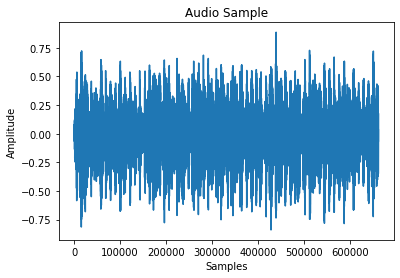

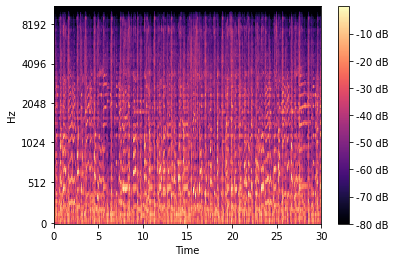

In [9]:
# original
visualize(sample, sr)

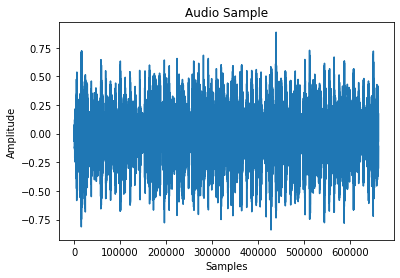

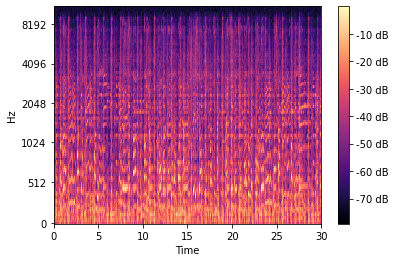

In [10]:
# noise
noise_sample = add_noise(sample, sample_rate=sr)
visualize(noise_sample, sr)

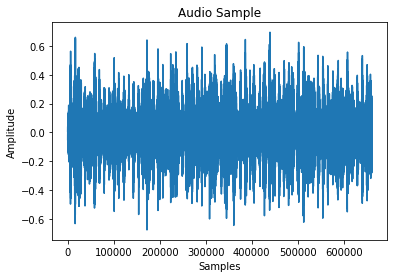

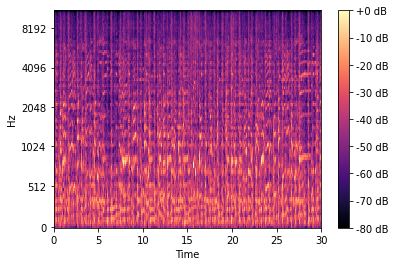

In [11]:
# pitch
pitch_sample = pitch_shift(sample, sample_rate=sr)
visualize(pitch_sample, sr)

## Build Dataset

In [16]:
from tqdm import tqdm
from pathlib import Path

In [35]:
# load samples into memory
X = []  # data list
Y = []  # label list

for wav_file in tqdm(Path(PATH_DATA).rglob("*.wav")):
    try:
        sample, sr = librosa.load(wav_file, duration=28)

        X.append(sample)
        Y.append(wav_file.parent.name)  # parent file's name is the corresponding label
    except:
        print("Error in file", wav_file)
        traceback.print_exc()  # print traceback

# convert list to a numpy array
X = np.stack(X)

551it [00:02, 205.30it/s]Traceback (most recent call last):
  File "C:\Users\ab\AppData\Roaming\Python\Python310\site-packages\librosa\core\audio.py", line 155, in load
    context = sf.SoundFile(path)
  File "C:\Users\ab\AppData\Roaming\Python\Python310\site-packages\soundfile.py", line 629, in __init__
    self._file = self._open(file, mode_int, closefd)
  File "C:\Users\ab\AppData\Roaming\Python\Python310\site-packages\soundfile.py", line 1183, in _open
    _error_check(_snd.sf_error(file_ptr),
  File "C:\Users\ab\AppData\Roaming\Python\Python310\site-packages\soundfile.py", line 1357, in _error_check
    raise RuntimeError(prefix + _ffi.string(err_str).decode('utf-8', 'replace'))
RuntimeError: Error opening 'data\\jazz\\jazz.00054.wav': File contains data in an unknown format.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ab\AppData\Local\Temp\ipykernel_16636\1691421530.py", line 7, in <cell line: 5>
    sa

Error in file data\jazz\jazz.00054.wav


1000it [00:08, 119.29it/s]


In [34]:
# split data
from sklearn.model_selection import train_test_split

# 'raw' because these are the raw audio signals without having computed their mel-spec features
# todo don't use sklearn -- plus will shuffle randomly ourselves anyway
X_raw_train, X_raw_test, Y_raw_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=6)

KeyboardInterrupt: 

In [33]:
# compute mel + augment data

# final dataset arrays
X_train = []
Y_train = []
X_test = []
# Y_test is identical to the above since the test data is never augmented, so the labels are the same

# train set
while len(X_raw_train) > 0:
    x = X_raw_train.pop()
    y = Y_raw_train.pop()

    # compute mel
    mel_x = mel(x, sr)

    Y_train.append()